In [1]:
# import librosa
# import IPython.display
# import matplotlib as mpl
# import matplotlib.font_manager as fm


In [2]:
# data.zip 파일 업로드

In [3]:
# zip file(.wav files) 압축 해제
import zipfile

fantasy_zip = zipfile.ZipFile('./content/data.zip')
fantasy_zip.extractall('./content/')
 
fantasy_zip.close()

In [4]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# spectrograms 변환 함수 만들기
# 참고: https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html
def make_iamge(SOURCE, TARGET):

    file = SOURCE
    y, sr = librosa.load(file) # (default  sr=22050)
    # Return
      # y: np.ndarray [shape=(n,) or (…, n)] / audio time series. Multi-channel is supported.
      # sr: number > 0 [scalar / sampling rate of
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    # Returns
      # S: np.ndarray [shape=(…, n_mels, t)] / Mel spectrogram
    S_dB = librosa.power_to_db(S, ref=np.max)
    if TARGET == '':
      plt.figure(figsize=(12, 4))
      librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
      plt.title('mel power spectrogram')
      plt.colorbar(format='%+02.0f dB')
      plt.tight_layout()
      plt.show()
    else:
      fig = plt.figure(figsize=(15, 15))
      plt.axis('off')
      librosa.display.specshow(S_dB, sr=sr)
      plt.savefig(TARGET, bbox_inches='tight', pad_inches=0)
      plt.close(fig)  

In [5]:
np.max

<function numpy.amax(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>

In [6]:
# Acoustic 드럼 소리와 Electronic 드럼 소리 Spectrogram비교

Acoustic Hi-Hat


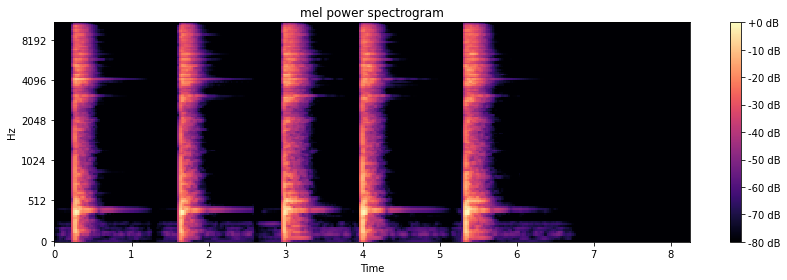

Electronic Hi-Hat


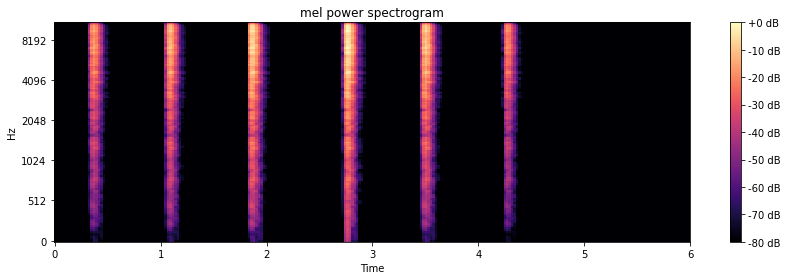

In [7]:
# 원본 Acoustic Hi-Hat 소리와 원본 Electronic Hi-Hat 소리를 1개씩 spectrogra으로 변환하여 비교
print("Acoustic Hi-Hat")
make_iamge('./content/data/wav_original/RealDrum01_00#HH#train.wav', '')
print("Electronic Hi-Hat")
make_iamge('./content/data/wav_original/TechnoDrum01_00#HH#train.wav', '')

Acoustic Kick Drum


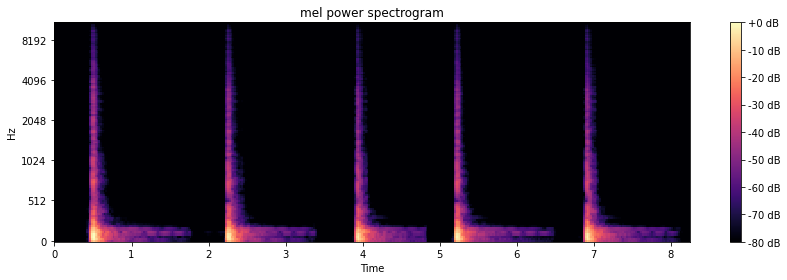

Electronic Kick Drum


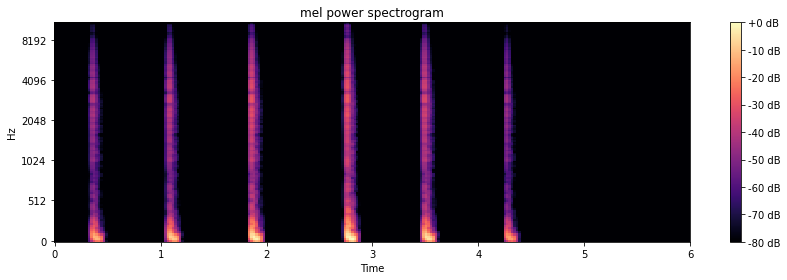

In [8]:
# 원본 Acoustic Kick Drum 소리와 원본 Electronic Kick Drum 소리를 1개씩 spectrogra으로 변환하여 비교
print("Acoustic Kick Drum")
make_iamge('./content/data/wav_original/RealDrum01_00#KD#train.wav', '')
print("Electronic Kick Drum")
make_iamge('./content/data/wav_original/TechnoDrum01_00#KD#train.wav', '')

Acoustic Snare Drum


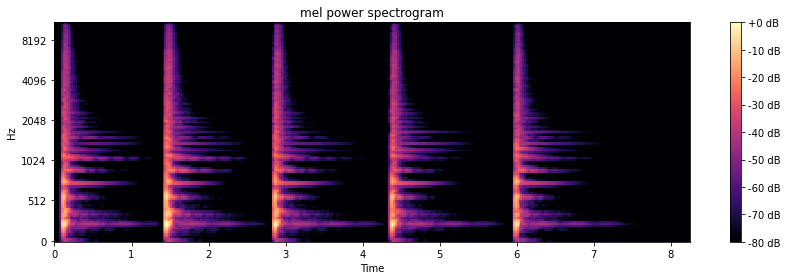

Electronic Snare Drum


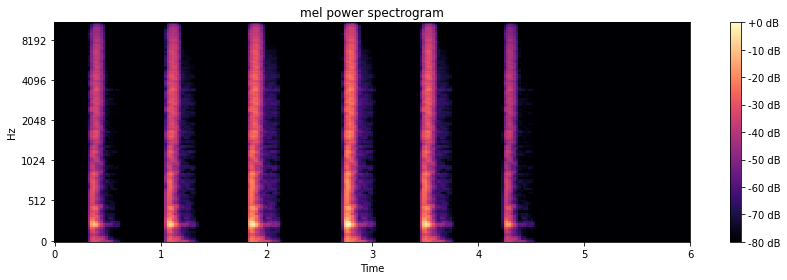

In [9]:
# 원본 Acoustic Snare Drum 소리와 원본 Electronic Snare Drum 소리를 1개씩 spectrogra으로 변환하여 비교
print("Acoustic Snare Drum")
make_iamge('./content/data/wav_original/RealDrum01_00#SD#train.wav', '')
print("Electronic Snare Drum")
make_iamge('./content/data/wav_original/TechnoDrum01_00#SD#train.wav', '')

In [10]:
# wav파일별로 Spectrogram 변환 실행위한 경로 변수 설정
in_path = './content/data/wav_split_final/'
out_path = './content/data/out/'
# label_path = ['a_h','a_k','a_s','e_h','e_k','e_s']
label_path = next(os.walk(in_path))[1]
len(label_path)

6

In [11]:
import os
walk = os.walk("./content/data/wav_split_final/")
print(walk)


<generator object _walk at 0x00000205C90DEF90>


In [12]:
# Spectrogram image 변환 결과물 저장 위해 폴더 및 파일 삭제
import shutil
shutil.rmtree(r'./content/data/out')

In [13]:
import os
# Spectrogram image 변환 결과물 저장폴더생성
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
outfolder = './content/data/out'
createFolder(outfolder)
for i in label_path:
  createFolder(outfolder+'/'+i)

In [14]:
from tqdm import tqdm
# wav파일별로 Spectrogram 변환 실행
count = 0
print("wav folders:", label_path)
for i in label_path:
        file_list = os.listdir(in_path+i)
        count = count + 1
        print(count,"/",len(label_path),' \'',i,'\'')
        for j in tqdm(file_list, position=0, leave=True):
            SOURCE = in_path+i+"/"+j
            TARGET = out_path+i+"/"+j[:-3]+"jpg"
            make_iamge(SOURCE, TARGET)

wav folders: ['a_h', 'a_k', 'a_s', 'e_h', 'e_k', 'e_s']
1 / 6  ' a_h '


100%|██████████| 158/158 [00:08<00:00, 18.15it/s]


2 / 6  ' a_k '


100%|██████████| 158/158 [00:08<00:00, 18.09it/s]


3 / 6  ' a_s '


100%|██████████| 158/158 [00:08<00:00, 18.30it/s]


4 / 6  ' e_h '


100%|██████████| 71/71 [00:03<00:00, 18.67it/s]


5 / 6  ' e_k '


100%|██████████| 71/71 [00:04<00:00, 17.47it/s]


6 / 6  ' e_s '


100%|██████████| 71/71 [00:03<00:00, 18.65it/s]


In [17]:
# import PIL
# import PIL.Image
# import tensorflow as tf
# import tensorflow_datasets as tfds

# 이미지 로드 및 전처리
# 참고: https://www.tensorflow.org/tutorials/load_data/images?hl=ko
#       Tensorflow공식 튜토리얼: 이미지 로드 및 전처리하기 
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
# import tensorflow_datasets as tfds

In [18]:
print(tf.__version__)

2.8.0


In [19]:
# 데이터세트 형식으로 만들기
import pathlib

data_dir = pathlib.Path('./content/data/out')
print(type(data_dir))
print(data_dir)

<class 'pathlib.WindowsPath'>
content\data\out


In [20]:
# image count
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

687


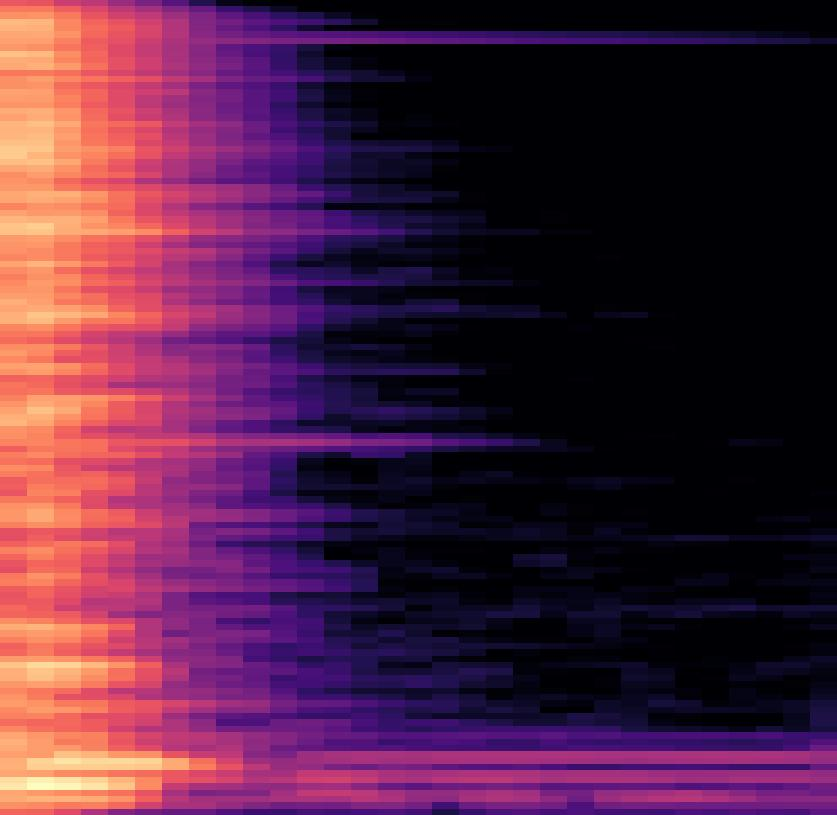

In [21]:
# image 1개 보기
a_h = list(data_dir.glob('a_h/*'))
PIL.Image.open(str(a_h[11]))

In [63]:
# 데이터세트 만들기
batch_size = 32
img_height = 180
img_width = 180

In [64]:
# Training set 80%
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(img_height, img_width),
    # color_mode='grayscale', #Default: "rgb"
    batch_size=batch_size,
)

Found 687 files belonging to 6 classes.
Using 550 files for training.


In [65]:
# Validation set 20%
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(img_height, img_width),
    # color_mode='grayscale', #Default: "rgb"
    batch_size=batch_size,
)

Found 687 files belonging to 6 classes.
Using 137 files for validation.


In [66]:
# class_names 속성에서 클래스 이름을 찾기
class_names = train_ds.class_names
print(class_names)

['a_h', 'a_k', 'a_s', 'e_h', 'e_k', 'e_s']


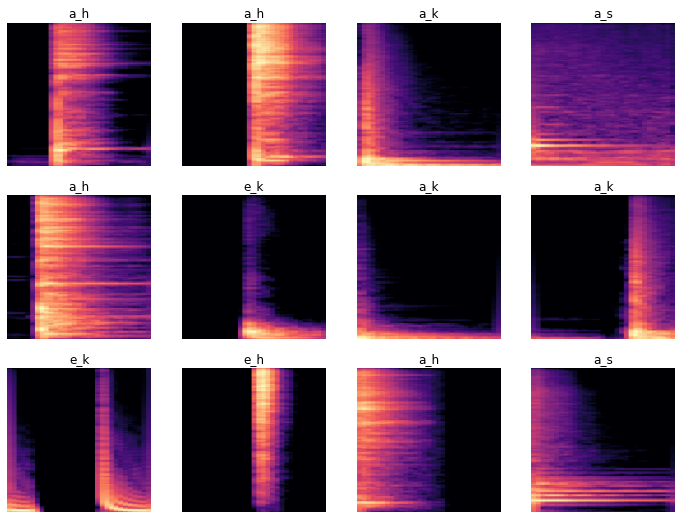

In [52]:
# 데이터 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [67]:
# 데이터세트에서 training data와 label을 가져와서 헐당
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 180, 180, 3)
(8,)


In [68]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (8, 180, 180, 3)
Label:  [3 0 0 3 3 2 5 0]


In [69]:
# 데이터 표준화하기
# [0, 1] 범위에 있도록 값을 표준화
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [70]:
# 표준화
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [71]:
# 성능을 위한 데이터세트 구성하기
# AUTOTUNE = tf.data.AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [72]:
# train_ds의 첫번째 항목 확인
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (8, 180, 180, 3)
Label:  [1 1 1 4 3 2 2 1]


In [73]:
# 모델 훈련하기
num_classes = 6

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [74]:
# 모델 훈련하기
num_classes = 6
# tf.keras.layers.Conv2D(
#     filters, kernel_size, strides=(1, 1), padding='valid',
#     data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
#     use_bias=True, kernel_initializer='glorot_uniform',
#     bias_initializer='zeros', kernel_regularizer=None,
#     bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
#     bias_constraint=None, **kwargs
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same", strides=1),#,input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding="same", strides=1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding="same", strides=1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(6, activation='softmax')
])

In [75]:
#model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [76]:
# 20번 epoch 훈련
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3


ResourceExhaustedError: in user code:

    File "C:\Users\astro\anaconda3\envs\ae2\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\astro\anaconda3\envs\ae2\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\astro\anaconda3\envs\ae2\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\astro\anaconda3\envs\ae2\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\astro\anaconda3\envs\ae2\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\astro\anaconda3\envs\ae2\lib\site-packages\keras\backend.py", line 1920, in random_uniform
        return tf.random.uniform(

    ResourceExhaustedError: Exception encountered when calling layer "sequential_5" (type Sequential).
    
    OOM when allocating tensor with shape[247808,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 180, 180, 3), dtype=float32)
      • training=True
      • mask=None


In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
# my_model.h5 삭제
file = '/content/my_model.h5'
if os.path.isfile(file):
  os.remove(file)
  print('removed')

In [ ]:
# 모델 저장
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# 참고: https://www.tensorflow.org/guide/keras/save_and_serialize?hl=ko
model.save("/content/my_model.h5")

In [ ]:
# 모델 불러오기
model = keras.models.load_model("/content/my_model.h5")

In [ ]:
model.summary()

In [ ]:
# 참고: https://www.tensorflow.org/guide/saved_model?hl=ko
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
test_wav1 = '/content/data/wave_youtube_drum_sound/a_s_y1/a_s_y1_003.wav'
test_jpg1 = '/content/data/wave_youtube_drum_sound/a_s_y1/a_s_y1_003.jpg'
make_iamge(test_wav1, test_jpg1)

test_wav2 = '/content/data/wave_youtube_drum_sound/a_h_y1/a_h_y1_002.wav'
test_jpg2 = '/content/data/wave_youtube_drum_sound/a_h_y1/a_h_y1_002.jpg'
make_iamge(test_wav2, test_jpg2)

test_wav3 = '/content/data/wave_youtube_drum_sound/a_k_y3/a_k_y3_003.wav'
test_jpg3 = '/content/data/wave_youtube_drum_sound/a_k_y3/a_k_y3_003.jpg'
make_iamge(test_wav3, test_jpg3)

test_wav4 = '/content/data/wave_youtube_drum_sound/e_h_y5/e_h_y5_003.wav'
test_jpg4 = '/content/data/wave_youtube_drum_sound/e_h_y5/e_h_y5_003.jpg'
make_iamge(test_wav4, test_jpg4)

test_wav5 = '/content/data/wave_youtube_drum_sound/e_k_y5/e_k_y5_003.wav'
test_jpg5 = '/content/data/wave_youtube_drum_sound/e_k_y5/e_k_y5_003.jpg'
make_iamge(test_wav5, test_jpg5)

test_wav6 = '/content/data/wave_youtube_drum_sound/e_s_y5/e_s_y5_003.wav'
test_jpg6 = '/content/data/wave_youtube_drum_sound/e_s_y5/e_s_y5_003.jpg'
make_iamge(test_wav6, test_jpg6)



In [ ]:
# file = tf.keras.utils.get_file(
#     "grace_hopper.jpg",
#     "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg")
# img = tf.keras.preprocessing.image.load_img(file, target_size=[224, 224])
img = tf.keras.preprocessing.image.load_img(test_jpg3, target_size=[180, 180])
plt.imshow(img)
plt.axis('off')
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])

In [ ]:
def run_predict(file):
  img = tf.keras.preprocessing.image.load_img(file, target_size=[180, 180])
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  # Create batch axis
  predictions = model.predict(img_array)

  print(file)
  print("Acoustic Hihat:",round(predictions[0,0]*100,2),"%")
  print("Acoustic Kick:",round(predictions[0,1]*100,2),"%")
  print("Acoustic Snare:",round(predictions[0,2]*100,2),"%")
  print("Electronic  Hihat:",round(predictions[0,3]*100,2),"%")
  print("Electronic  Kick:",round(predictions[0,4]*100,2),"%")
  print("Electronic  Snare:",round(predictions[0,5]*100,2),"%")

In [ ]:
run_predict(test_jpg1)

In [ ]:
run_predict(test_jpg2)

In [ ]:
run_predict(test_jpg3)

In [ ]:
run_predict(test_jpg4)

In [ ]:
run_predict(test_jpg5)

In [ ]:
run_predict(test_jpg6)